# Cosine Distance

Cosine distance measures the dissimilarity between two vectors based on the cosine of the angle between them. It focuses purely on the direction of the vectors, ignoring their magnitude (length). The closer the vectors are in direction (smaller angle), the smaller the cosine distance (and higher the cosine similarity).

Think of it this way: if two vectors point in almost the same direction, they are considered very similar, even if one vector is much longer than the other.

Formulas:

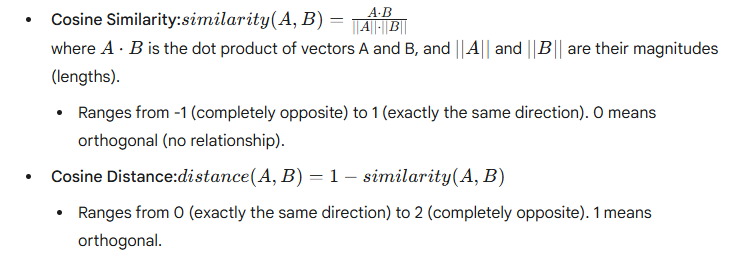

Example: Customer Movie Preferences

Imagine a streaming service wants to recommend movies. They track how much a customer watches certain genres. Let's simplify and say we track two genres: Action and Comedy. The values represent hours watched in a month.

* Customer A: Watches 10 hours of Action, 2 hours of Comedy.
   * Vector A = (10, 2)
* Customer B: Watches 5 hours of Action, 1 hour of Comedy.
   * Vector B = (5, 1)
* Customer C: Watches 3 hours of Action, 9 hours of Comedy.
   * Vector C = (3, 9)
   
Let's calculate the Cosine Distance:

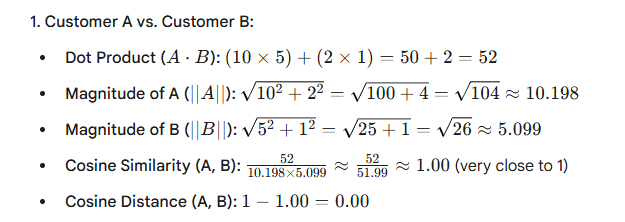

Interpretation (A vs B): The cosine distance is very close to 0. This means Customer A and Customer B have very similar preferences in terms of the proportion of Action vs. Comedy they watch. Both watch 5 times more Action than Comedy. Even though Customer A watches more movies overall, their taste profile is identical.

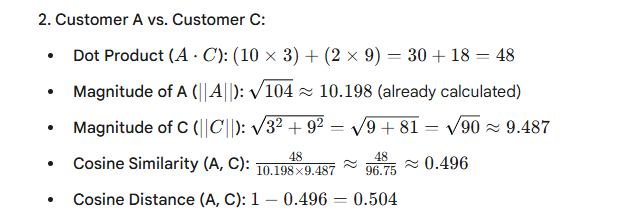

Interpretation (A vs C): The cosine distance (0.504) is significantly larger than 0. This indicates that Customer A and Customer C have dissimilar preferences. Customer A prefers Action heavily, while Customer C prefers Comedy heavily. Their vectors point in very different directions.

When to Use Cosine Distance:

Cosine distance is ideal when:

* The magnitude (total quantity, like total hours watched, or total word count in a document) is not as important as the proportion or pattern of values across features.
* You are dealing with sparse data, such as in text analysis (where vectors represent word frequencies).
* You want to compare the "orientation" of user preferences, document topics, or image features.

# Notebook Structure

1. Import necessary libraries
2. Create the dataset
3. Choose a reference student
4. Calculate Cosine Distance between the reference student and all other students

# 1. Import necessary libraries

In [20]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_distances # Import the specific function

# 2. Create the dataset

In [21]:
# 1. Create a dataset with 20 students and convert to DataFrame
np.random.seed(42) # for reproducibility

num_students = 20
data = {
    'Hours Studied': np.random.randint(5, 20, num_students),
    'Practice Questions': np.random.randint(30, 150, num_students),
    'Attendance Rate': np.random.randint(60, 100, num_students),
    'Prior Exam Score': np.random.randint(50, 95, num_students)
}

In [22]:
# Convert it into a dataframe and add a index

students_df = pd.DataFrame(data)
students_df.index = [f'Student_{i+1}' for i in range(num_students)]

In [23]:
print("Original Student Learning Pattern Data (DataFrame):")

students_df

Original Student Learning Pattern Data (DataFrame):


,Hours Studied,Practice Questions,Attendance Rate,Prior Exam Score
Student_1,11,51,87,84
Student_2,8,82,75,63
Student_3,17,31,74,66
Student_4,19,117,62,85
Student_5,15,137,96,89
Student_6,12,59,66,53
Student_7,17,67,80,51
Student_8,9,31,68,55
Student_9,11,93,98,91
Student_10,14,89,77,53


# 3. Choose a reference student

In [24]:
# 2. Choose a reference student (e.g., the first student in the DataFrame)

# Let's pick 'Student_1'
reference_student_name = students_df.index[0]

# Extract the reference student's pattern as a 2D NumPy array
# .values extracts the numpy array, .reshape(1, -1) converts it to a 2D array with 1 row
reference_student_pattern = students_df.loc[reference_student_name].values.reshape(1, -1)

print(f"Reference Student for Comparison: {reference_student_name}")
print(f"Pattern: {students_df.loc[reference_student_name].to_dict()}")
print("-" * 70)

Reference Student for Comparison: Student_1
Pattern: {'Hours Studied': 11, 'Practice Questions': 51, 'Attendance Rate': 87, 'Prior Exam Score': 84}
----------------------------------------------------------------------


# 4. Calculate Cosine Distance between the reference student and all other students

### A. Calculate Cosine Distance between the reference student and all other students

In [25]:
# Calculate Cosine Distance between the reference student and all other students

print("--- Calculating Cosine Distances for Student Similarity ---")
print("(No explicit standardization performed, as typically not needed for Cosine Distance)")

# Calculate distances from the reference student to ALL students (including itself)
# The output is a 2D array (1 row, num_students columns)
all_distances_array = cosine_distances(reference_student_pattern, students_df.values)

# Flatten the array to get a 1D array of distances
distances_flat = all_distances_array.flatten()

--- Calculating Cosine Distances for Student Similarity ---
(No explicit standardization performed, as typically not needed for Cosine Distance)


### B. Top and botton 5 similar students to reference student

In [19]:
# Create a dictionary to store distances, excluding the reference student itself

student_distances = {}
for i, student_name in enumerate(students_df.index):
    if student_name != reference_student_name:
        student_distances[student_name] = distances_flat[i]

# Sort students by their cosine distance (lower distance = higher similarity)
sorted_similar_students = sorted(student_distances.items(), key=lambda item: item[1])

print(f"\nTop 5 Most Similar Students to {reference_student_name} (by Cosine Distance):")
for student, dist in sorted_similar_students[:5]:
    print(f"- {student} (Cosine Distance: {dist:.4f}) - Pattern: {students_df.loc[student].to_dict()}")

print("\nBottom 5 Least Similar Students to {reference_student_name} (by Cosine Distance):")
for student, dist in sorted_similar_students[-5:]:
    print(f"- {student} (Cosine Distance: {dist:.4f}) - Pattern: {students_df.loc[student].to_dict()}")
print("-" * 70)

print("\n--- Interpretation in the Context of Student Data ---")
print("When using Cosine Distance with student data, we are looking for students whose *proportional* study habits are similar, rather than their absolute efforts.")
print("For example, a student who scored (10 hours, 100 questions, 80% attendance) might be considered very similar to a student who scored (5 hours, 50 questions, 40% attendance) if the ratios between their efforts are consistent.")
print("This might be useful if you're trying to find students with similar 'types' of study approaches, but it can ignore the fact that one student put in significantly more *absolute* effort than another.")
print("As we discussed, for this kind of data, Euclidean distance (especially with standardization) often provides a more intuitive measure of overall difference in effort and achievement.")


Top 5 Most Similar Students to Student_1 (by Cosine Distance):
- Student_15 (Cosine Distance: 0.0001) - Pattern: {'Hours Studied': 12, 'Practice Questions': 51, 'Attendance Rate': 85, 'Prior Exam Score': 83}
- Student_8 (Cosine Distance: 0.0051) - Pattern: {'Hours Studied': 9, 'Practice Questions': 31, 'Attendance Rate': 68, 'Prior Exam Score': 55}
- Student_3 (Cosine Distance: 0.0083) - Pattern: {'Hours Studied': 17, 'Practice Questions': 31, 'Attendance Rate': 74, 'Prior Exam Score': 66}
- Student_11 (Cosine Distance: 0.0085) - Pattern: {'Hours Studied': 7, 'Practice Questions': 50, 'Attendance Rate': 63, 'Prior Exam Score': 78}
- Student_12 (Cosine Distance: 0.0112) - Pattern: {'Hours Studied': 11, 'Practice Questions': 62, 'Attendance Rate': 84, 'Prior Exam Score': 67}

Bottom 5 Least Similar Students to {reference_student_name} (by Cosine Distance):
- Student_17 (Cosine Distance: 0.0781) - Pattern: {'Hours Studied': 8, 'Practice Questions': 118, 'Attendance Rate': 79, 'Prior Exam

# Interpretation

Cosine distance typically does not require standardization, and in many common use cases, it's actually undesirable. Cosine distance measures the cosine of the angle between two vectors, focusing purely on their direction rather than their magnitude. When standardizing (e.g., Z-score scaling), you change the magnitude and potentially the origin of the vectors. If your problem relies on the relative magnitudes of features (e.g., higher values mean more of something important) or the absolute counts in sparse data (like word counts in text), standardization would remove this valuable information, making cosine distance less effective. It's already inherently normalized by vector magnitude as part of its calculation.